# OCR Label Detection

This is a demonstration of the image_str module, which allows you to identify specific labels on the International Space Station (ISS).

By providing a folder containing images or a specific image taken from the ISS panorama, image_str will analyze each image and generate a pandas dataframe that includes all the labels found in the images. If you specify a result folder, a CSV file will be created, containing the labels and boundary boxes for each individual image. If you also provide a bagfile path associated with the images, the module will generate the 3D positions of each label. Additionally, a CSV file named "all_locations.csv" will be created, containing all the labels found in the images.

Alternatively, if you already have a generated CSV file, you can use it to construct a dataframe for label searching purposes.

## Setup

In [1]:
from image_str.parse_img import Ocr
from matplotlib import pyplot as plt
import warnings
import pandas as pd
import os

warnings.filterwarnings('ignore')

Set the bagfile path of the ISS images. If no path is given, then the 3D location of the labels on the ISS would not be provided.

In [3]:
bag_path = "data/images/queen/"

Set Astrobee Variables

In [4]:
os.environ["ASTROBEE_CONFIG_DIR"] = "/src/astrobee/src/astrobee/config"
os.environ["ASTROBEE_RESOURCE_DIR"] = "/src/astrobee/src/astrobee/resources"
os.environ["ASTROBEE_ROBOT"] = "queen"
os.environ["ASTROBEE_WORLD"] = "iss"

## Set Image Path or Folder

In [5]:
# Make sure the image_path and the image_folder is within a folder with the name of the astrobee (ie. queen)
image_path = 'data/images/queen/isaac_sci_cam_image_delayed/1657544487.355.jpg'
image_folder = 'data/images/queen/isaac_sci_cam_image_delayed/'

## Set Result Folder

The result folder is where the results will be saved. If no result folder is provided, the dataframe and images will not be saved to files.

In [6]:
result_folder = 'results/queen/' 

## Create ocr Object

The Ocr class is the interface in which we can parse through images and search for labels. There are three ways to create an useful instance of Ocr. 

1. Create an instance of Ocr and pass in the craft trained model and the bag path (recommended). Call the parse_folder function with the path to the ISS image folder.
2. Same as 1 but instead of calling parse_folder, call parse_image if you only have one image to search.
3. If an csv file exists with the necessary columns (label, PCL Intersection, Mesh Intersection, image, and location), you can create the instance using Ocr.df_from_file.

In [7]:
ocr = Ocr(bag_path=bag_path, trained_model="data/model/craft_mlt_25k.pth")

Downloading: "https://github.com/baudm/parseq/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/baudm/parseq/releases/download/v1.0.0/parseq-bb5792a6.pt" to /root/.cache/torch/hub/checkpoints/parseq-bb5792a6.pt
100%|██████████| 91.0M/91.0M [00:10<00:00, 9.48MB/s]


In [ ]:
ocr.parse_image(image_path, result_folder=result_folder, increment=True)

In [ ]:
# Queen Dataset (Bays 1, 2, and 3)
ocr.parse_folder(image_folder, result_folder=result_folder, increment=True)

Using cache found in /root/.cache/torch/hub/baudm_parseq_main
Parsing through Images:   3%|▎         | 6/231 [16:39<10:17:00, 164.54s/it]

If a final file is passed in, parse_folder will append results to the final folder.

In [9]:
# Bumble Dataset (Bays 4, 5, and 6)
os.environ["ASTROBEE_ROBOT"] = "bumble"
image_folder = 'data/images/bumble/isaac_sci_cam_image_delayed/'
result_folder = 'results/bumble/' 
result_file = 'results/test.csv'
bag_path = "data/images/bumble/"
ocr.set_bag_path(bag_path)

ocr.parse_folder(image_folder, result_folder=result_folder, increment=False, final_file=result_file)

If csv file is provided, generate dataframe directly.

In [2]:
ocr = Ocr.df_from_file('results/all_locations_final.csv')

## Find Specific Label

Given the dataframe, you can search for a specific label. find_panorama will return three lists: full, crop, and locations. full contains images with all the specified labels boxed. crop contains cropped images with the labels and locations contains arrays with the 3D positions of the labels. locations will be None if dataframe does not contain 3D locations.

Searching for Rack Power:   1%|▏         | 1/74 [00:00<00:32,  2.27it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay5&pitch=-38.072000&yaw=-73.997550&hfov=30
Position (x, y, z): [0.8637980000000001, -0.8510005, 5.583955]
 Orientation (roll, pitch, yaw): [0.0, 38.072, -73.99755]



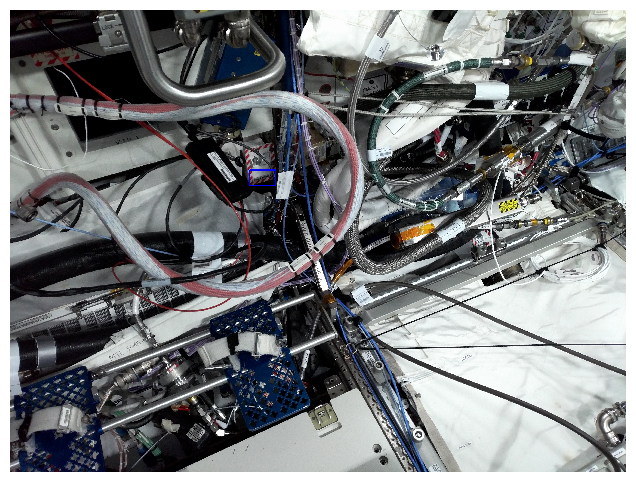

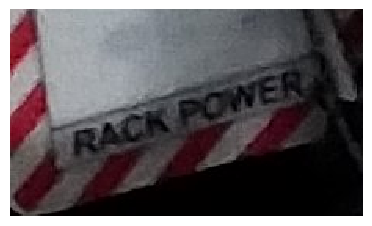

Searching for Rack Power:   5%|▌         | 4/74 [00:04<01:01,  1.13it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay6&pitch=-55.356200&yaw=-62.799850&hfov=30
Position (x, y, z): [0.0036574050000000003, -0.4624285, 5.768560000000001]
 Orientation (roll, pitch, yaw): [0.0, 55.3562, -62.79985]



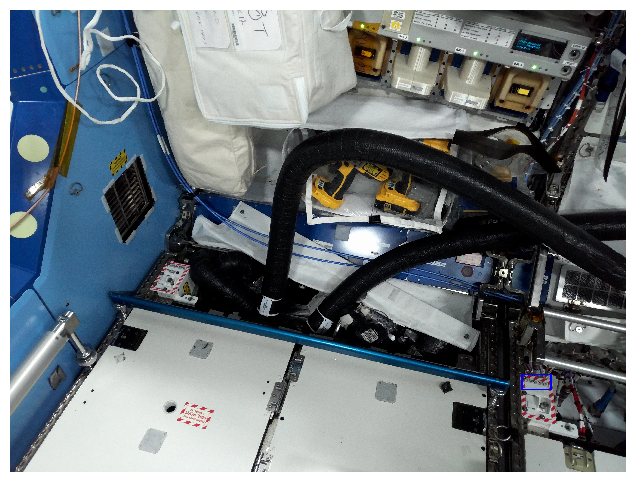

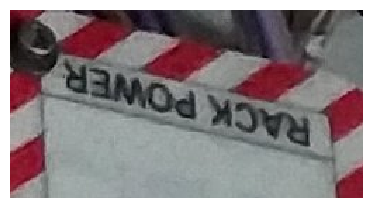

Searching for Rack Power:  11%|█         | 8/74 [00:07<00:40,  1.63it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay4&pitch=36.619350&yaw=71.250850&hfov=30
Position (x, y, z): [1.915965, 0.825197, 4.25636]
 Orientation (roll, pitch, yaw): [0.0, -36.61935, 71.25085]



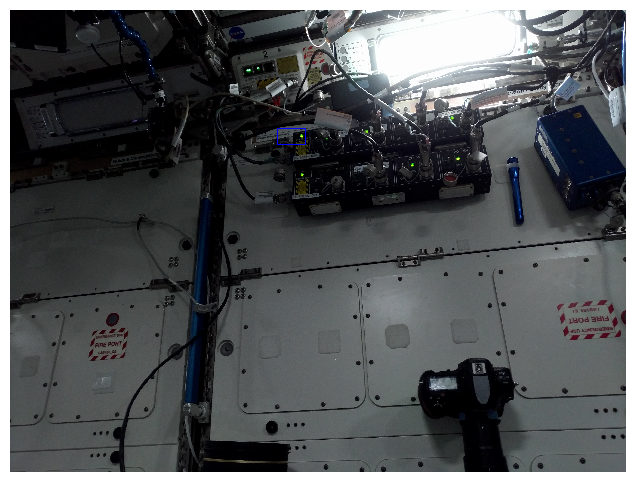

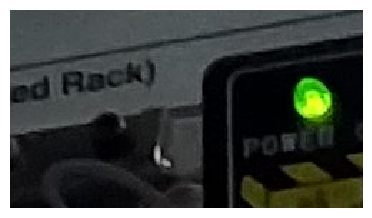

Searching for Rack Power:  15%|█▍        | 11/74 [00:09<00:41,  1.52it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay5&pitch=-34.933350&yaw=117.253000&hfov=30
Position (x, y, z): [0.247999, 0.7015055, 5.44337]
 Orientation (roll, pitch, yaw): [0.0, 34.933350000000004, 117.253]



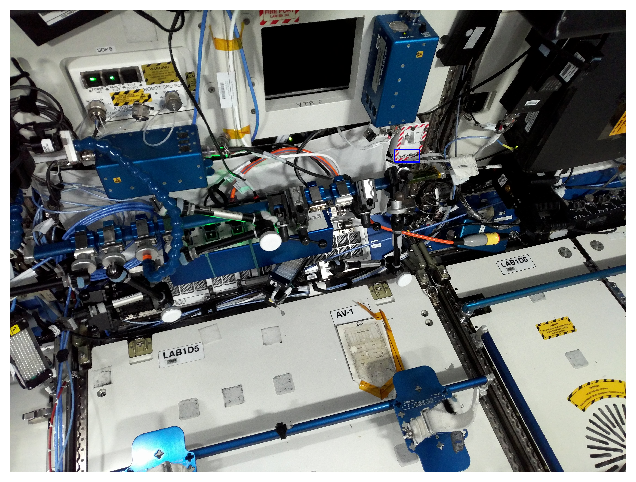

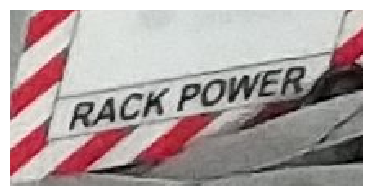

Searching for Rack Power:  19%|█▉        | 14/74 [00:12<00:40,  1.48it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay6&pitch=-32.921050&yaw=70.841900&hfov=30
Position (x, y, z): [0.022102666, 1.1096650000000001, 5.635260000000001]
 Orientation (roll, pitch, yaw): [0.0, 32.92105, 70.84190000000001]



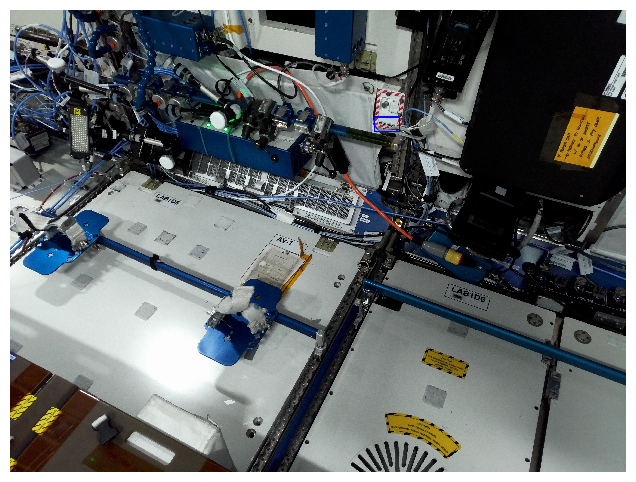

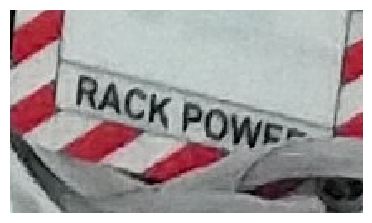

Searching for Rack Power:  23%|██▎       | 17/74 [00:14<00:38,  1.48it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay5&pitch=-51.844600&yaw=-130.825000&hfov=30
Position (x, y, z): [0.140006, -0.45827949999999995, 5.80804]
 Orientation (roll, pitch, yaw): [0.0, 51.8446, -130.825]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay5&pitch=-34.741750&yaw=-74.633750&hfov=30
Position (x, y, z): [0.9518329999999999, -0.882198, 5.5246200000000005]
 Orientation (roll, pitch, yaw): [0.0, 34.741749999999996, -74.63374999999999]



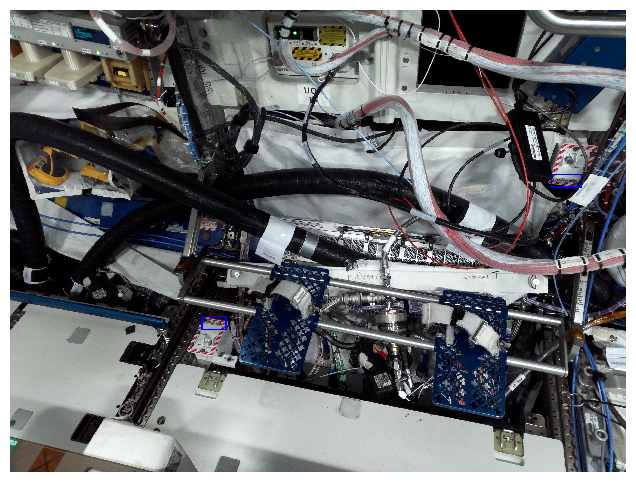

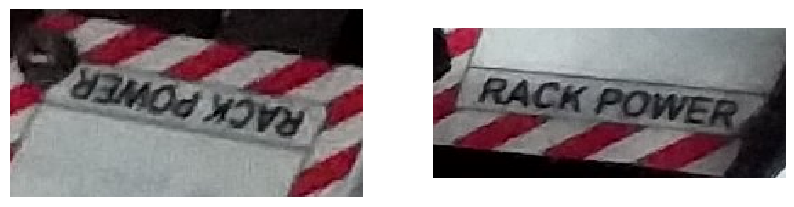

Searching for Rack Power:  24%|██▍       | 18/74 [00:16<01:01,  1.10s/it]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay1&pitch=-34.334800&yaw=-63.135100&hfov=30
Position (x, y, z): [5.27299, -1.220165, 5.812765000000001]
 Orientation (roll, pitch, yaw): [0.0, 34.3348, -63.1351]



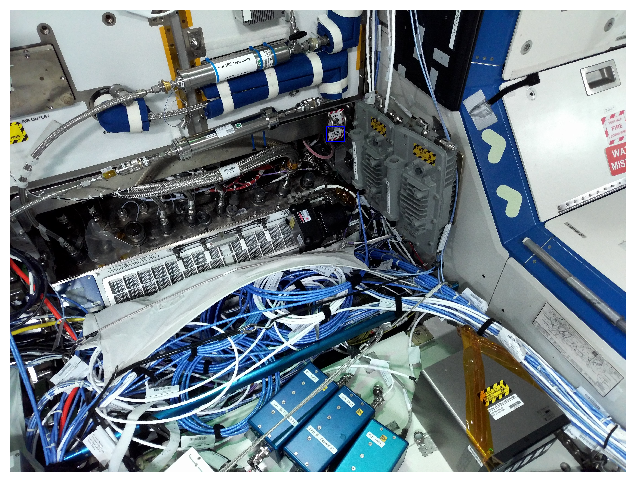

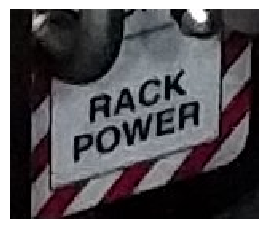

Searching for Rack Power:  31%|███       | 23/74 [00:20<00:28,  1.76it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay5&pitch=-34.303550&yaw=118.004000&hfov=30
Position (x, y, z): [0.2800625, 0.6573035, 5.4368]
 Orientation (roll, pitch, yaw): [0.0, 34.30355, 118.00399999999999]



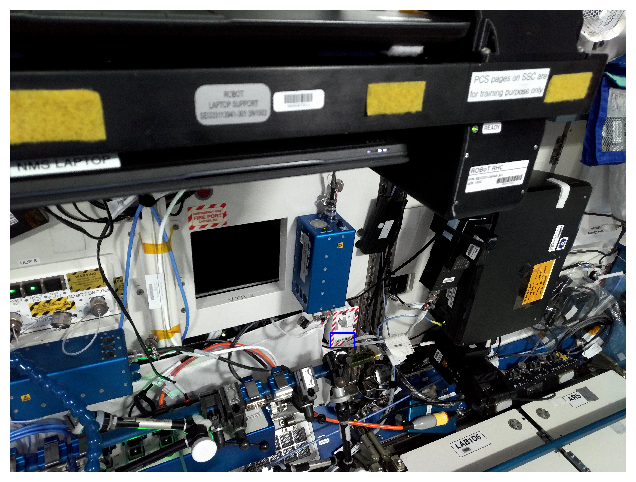

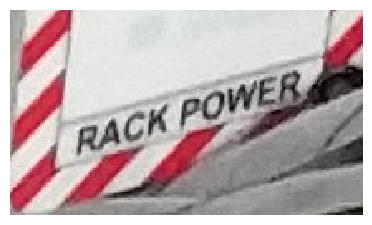

Searching for Rack Power:  38%|███▊      | 28/74 [00:23<00:22,  2.06it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay6&pitch=54.587800&yaw=-75.787950&hfov=30
Position (x, y, z): [-0.168655, -0.721814, 3.8569]
 Orientation (roll, pitch, yaw): [0.0, -54.5878, -75.78795]



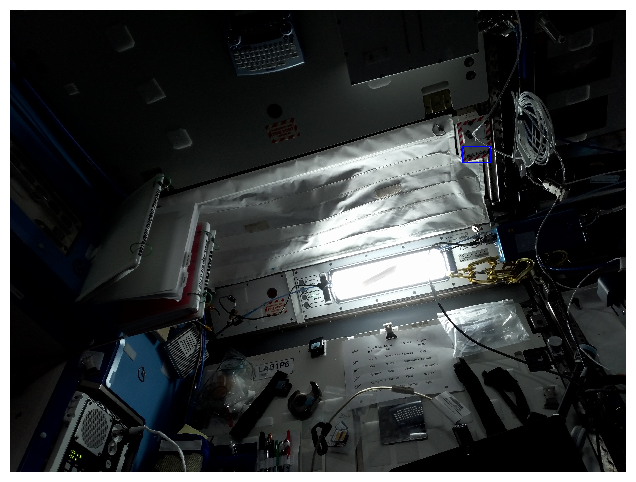

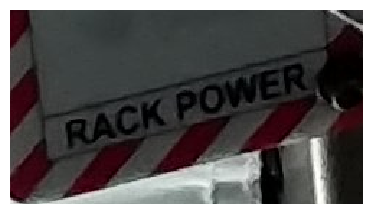

Searching for Rack Power:  46%|████▌     | 34/74 [00:26<00:17,  2.34it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay5&pitch=-34.566400&yaw=118.151500&hfov=30
Position (x, y, z): [0.277207, 0.722505, 5.44655]
 Orientation (roll, pitch, yaw): [0.0, 34.5664, 118.1515]



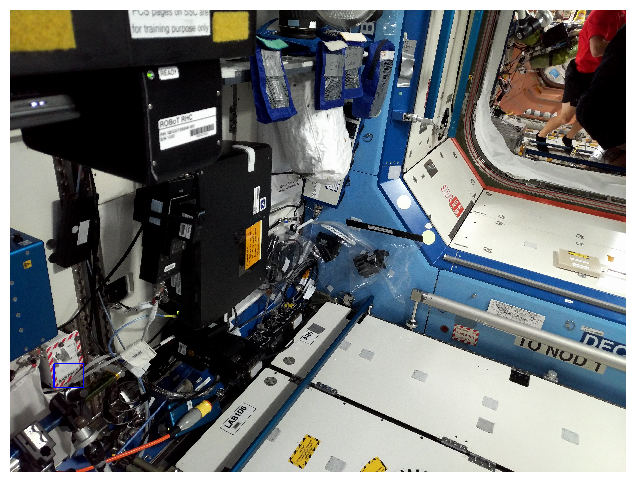

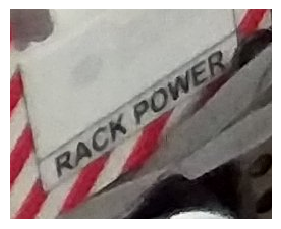

Searching for Rack Power:  57%|█████▋    | 42/74 [00:31<00:11,  2.72it/s]

https://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=tour.json&firstScene=usl_bay6&pitch=-33.160750&yaw=71.786450&hfov=30
Position (x, y, z): [0.004398029999999999, 1.004561, 5.641830000000001]
 Orientation (roll, pitch, yaw): [0.0, 33.16075, 71.78645]



In [ ]:
label = 'Rack Power'
full, crop, locations = ocr.find_label(label)

If you only want to display the cropped images or the full images, use the display_images function.

In [ ]:
ocr.display_images(crop)

In [ ]:
ocr.display_images(full)